# 분류 알고리즘
- 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

- 대표적인 분류 알고리즘들
    - 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
    - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
    - 데이터 균일도에 따른 규칙 기반의 결정 트리
    - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
    - 근접 거리를 기준으로 하는 최소 근접 알고리즘
    - 심층 연결 기반의 신경망
    - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블

### 결정트리와 앙상블
- 결정트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
- 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점 존재

- 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용
- 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약학 학습기가 되기 때문(GBM, XGBoost, LightGBM 등)

### Decision Tree
- 결정 트리 알고리즘은 데이터에 있는 규칙을 학습을 통해 자동으로 팢아내 트리 기반의 분류 규칙을 만듦
- 따라서 데이터의 어떤 기준을 바타응로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함

### 정보 균일도 측정 방법
- 정보 이득
    - 정보 이득은 엔트로피라는 개념을 기반으로 함
    - 엔트로피는 주어진 데이터 집합의 혼잡도를 의미
    - 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
    - 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값 즉, 1 - 엔트로피 지수
    - 결정트리는 이 정보 이득 지수로 분할 기준 정함
    - 즉, 정보 이득이 높은 속성을 기준으로 분할

- 지니 계수
    - 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
    - 0이 가장 평등하고 1로 갈수록 불평등
    - 머신러닝에 적용될 때는 의미론적으로 재해석 되어 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우에는 불평등한 값이 됨
    - 다양성이 낮을수록 균일도가 높다는 의미로서 1로 갈수록 균일도가 높으므로 지니계수가 높은 속성을 기준으로 분할하는 것

### Decision Tree
- 기본적으로 지니 계수를 이용해 데이터 세트를 분할
- 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 의사결정 트리 노드에 분할
- 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류 결정

- 결정 트리 장점
    - 쉽다. 직관적이다.
    - 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
- 결정 트리 단점
    - 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요


In [1]:
import sklearn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifiee 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

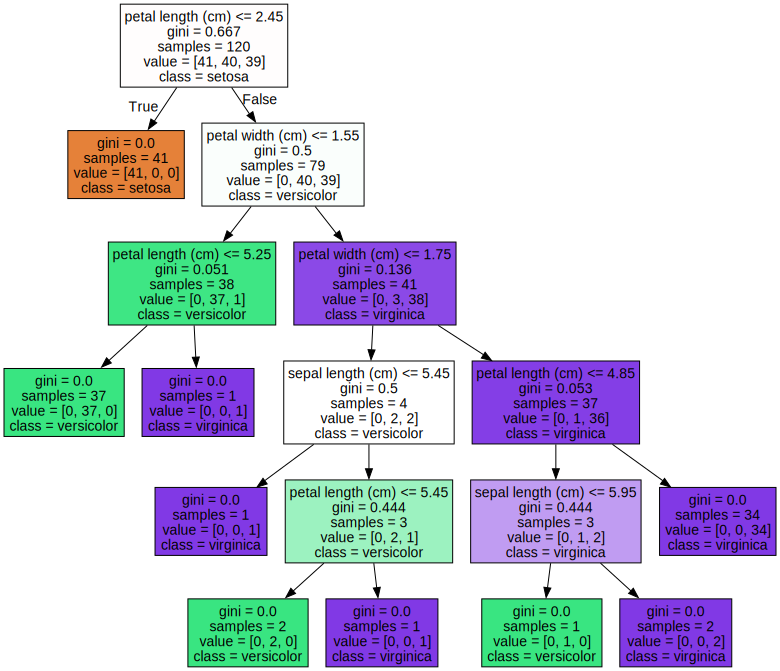

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 결정트리의 피처 선택 중요도

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

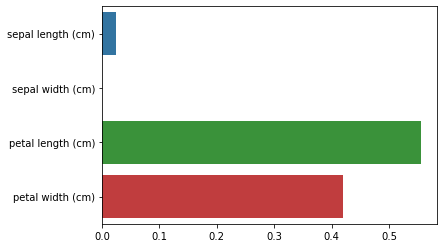

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 결정트리 과적합

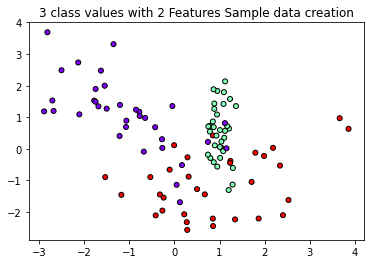

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생상
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative =2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, cmap = 'rainbow', edgecolors = 'k')

### visualize_boundary() 생성

In [11]:
import numpy as np

# Classifier Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolors = 'k', clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200), np.linspace(ylim_start, ylim_end, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder = 1)

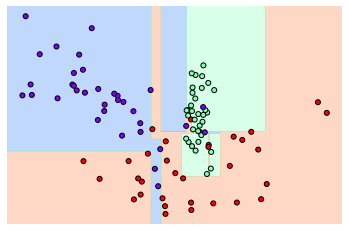

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
df_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

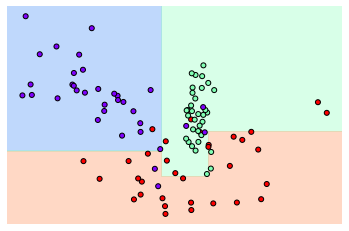

In [13]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('../datasets/Human_activity.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 :', feature_name[:10])

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [15]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [16]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'-'+str(x[1]) if x[1] > 0 else x[0], axis = 1)

    new_feature_name_df = new_feature_name_df.drop('index', axis = 1)
    return new_feature_name_df

In [17]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('../datasets/Human_activity.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/test/X_test.txt', sep = '\s+', names = feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/test/y_test.txt', sep = '\s+', header = None, names = ['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [18]:
print('학습 피처 데이터셋 info()')
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [19]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [20]:
X_train.isna().sum().sum()

0

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복할 때마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 :{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 :0.8513
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


In [24]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋 정확도 수치 추출
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [25]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_depth = {0} 정확도 : {1:.4f}".format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [27]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [28]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


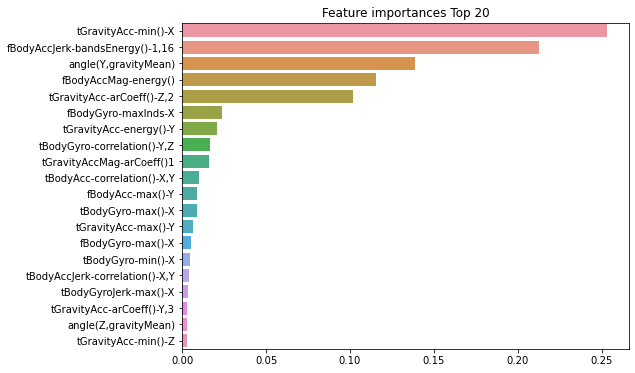

In [29]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### 앙상블 학습
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 앙상블 유형 : 보팅, 배깅, 부스팅으로 구분할 수 있으며 이외에 스태킹 기법도 있음
- 대표적인 배깅은 랜덤 포레스트 알고리즘이 있으며, 부스팅은 에이다 부스팅, 그래디언트 부스팅, XGBoost, LightGBM 등이 있음
- 정형 데이터의 분류나 회귀에서는 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냄

### 앙상블 특징
- 단일 모델의 약점을 다수의 모델들을 결합하여 보완
- 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음
- 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함
- 결정 트리의 단점인 과적합을 수십~수천 개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨

### 보팅 vs 배깅
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 보팅과 배깅의 차이
    - 배깅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것

### Voting Classifier

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

### 배깅 - 랜덤 포레스트
- 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 에측 성능을 보이고 있다.
- 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정 하게 됨
- 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑 분할 방식이라고 함 (배깅은 부트스트래핑 줄임말)

### Random Forest

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [4]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/datasets/UCI HAR Dataset/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/test/X_test.txt', sep = '\s+', names = feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('/Users/eunjin/Documents/GitHub/machine_learning/UCI HAR Dataset/test/y_test.txt', sep = '\s+', header = None, names = ['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9253


In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 0.9180


In [10]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9165


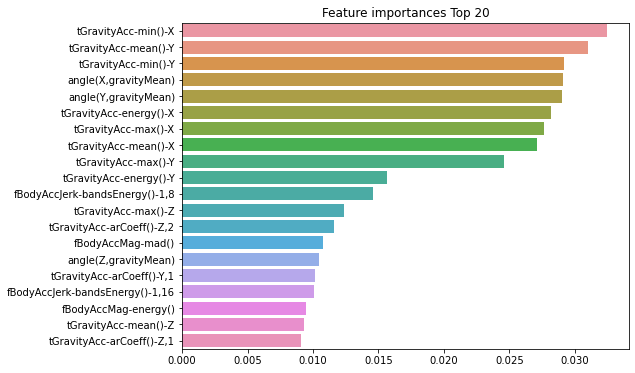

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### 부스팅
- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적인 구현은 AdaBoost, GBM(경사하강법 사용)
- 경사하강법은 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것
- 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법
- 수행시간이 엄청 걸림

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {:.1f}'.format(time.time() - start_time))


GBM 정확도 : 0.9393
GBM 수행 시간 : 915.4


In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터 :
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


In [14]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {:.4f}'.format(gb_accuracy))

GBM 정확도 : 0.9393


### 서포트 벡터 머신
- 분류와 회귀 방식에 모두 사용 가능
- 선형적인 경우 뿐만 아니라 초평면과 같은 비선형적인 경우에도 사용할 수 있음
- 주어진 데이터 집합을 바탕으로 테스트 데이터가 비확률적인 이진 선형 분류 모델에도 적용할 수 있음
- 감마
    - 감마의 값을 증가시키면 결정 경계가 더욱 복잡해지며 서포트 벡터 머신에서는 과도한 연산을 초래할 수 있지만 인식률을 향상시킬 수 있음
    - 데이터의 양과 특성에 적절한 값을 설정
- C
    - C의 값은 학습 시 잘못된 분류를 생성할 때 부여하는 벌점을 의미
    - 큰 값을 설정하면 분류의 결과에 오버피팅을 초래
    - 작은 값을 설정하면 언더피팅이 발생

### KNN 알고리즘
- 모든 기계 학습 알고리즘 중에 가장 간단하고 이해하기 쉬운 분류 알고리즘
- 특징 공간에 있는 모든 데이터에 대한 정보가 필요. 가장 가까운 이웃을 찾기 위해 새로운 데이터에서 모든 기존 데이터까지의 거리를 확인해야 하기 때문
- 데이터와 클래스가 많이 있다면, 많은 메모리 공간과 계산 시간이 필요
- 어떤 종류의 학습이나 준비 시간이 필요 없음


In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = accuracy_score(y_test, y_pred)
scores

0.9666666666666667

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)

classes = {0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'}

x_new = [[3, 4, 5, 2], [5, 4, 2, 2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
